<h1> Exploratory Data Analysis (EDA) </h1>

## Introduction
- Brief explanation of EDA
- Importance of EDA in data analysis

## Setup
- Import necessary libraries
```python
# Code snippet for importing libraries
pip install pandas numpy matplotlib seaborn plotly scikit-learn edvart

```
## Load Dataset
- Load your dataset
```python
# Code snippet for loading dataset
import pandas as pd
df = pd.read_csv('path_to_your_dataset.csv')
df.head()
```

## Data Overview
- Display the first few rows of the dataset
- Show the shape of the dataset
- Describe the basic statistics of the dataset



## Univariate Analysis
- Analyze the distribution of individual variables

## Bivariate Analysis
- Analyze the relationship between pairs of variables

## Multivariate Analysis
- Analyze the interactions between multiple variables

## Outlier Detection
- Use appropriate methods to detect outliers in your dataset

## Conclusion
- Summarize the insights gained from the EDA

## References
- Include any references or resources used in your analysis



### I. Introduction to EDA
#### A. Definition and Importance
Exploratory Data Analysis (EDA) is the initial process of analyzing data sets to summarize their main characteristics, often with visual methods. Its primary goal is to understand what the data can tell us beyond the formal modeling or hypothesis testing task. EDA helps us to:
- Summarize main characteristics of data.
- Gain better understanding of the dataset.
- Identify relationships between variables.
- Detect outliers and anomalies.
- Formulate hypotheses for further analysis.

#### B. Goals of EDA
The goals of EDA include:
- Identifying patterns in the data.
- Determining relationships between variables.
- Uncovering underlying structure.
- Identifying anomalies or outliers.
- Assessing assumptions for statistical methods.

#### C. Tools and Libraries
In Python, several libraries are commonly used for EDA:
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computing.
- **Matplotlib**: For basic plotting.
- **Seaborn**: For statistical data visualization.
- **Plotly**: For interactive visualizations.
- **Scikit-learn**: For machine learning algorithms.
- **Edavart**: For advanced visualizations.



### II. Understanding the Dataset
#### A. Dataset Overview
##### 1. Loading Data
We'll demonstrate loading the Titanic dataset using Pandas:


In [10]:
import pandas as pd

# Load Titanic dataset
titanic_df = pd.read_csv(r"datasets\titanic\train.csv")

##### 2. Basic Statistics
Basic statistics provide an initial understanding of the dataset. We'll use `.info()` and `.describe()` methods:


In [11]:
# Overview of the dataset
print(titanic_df.info())

# Summary statistics
print(titanic_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

#### B. Data Cleaning and Preprocessing
##### 1. Handling Missing Values
Handling missing values is crucial to ensure accurate analysis. We'll fill missing values or drop rows/columns with missing data:


In [12]:
# Check for missing values
print(titanic_df.isnull().sum())

# Fill missing values
titanic_df["Age"].fillna(titanic_df["Age"].median(), inplace=True)
titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0], inplace=True)

# Drop rows with missing values
titanic_df.dropna(subset=["Cabin"], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##### 2. Removing Duplicates
Removing duplicates ensures data integrity:

In [13]:
# Check for duplicates
print("Duplicates before removal:", titanic_df.duplicated().sum())

# Remove duplicates
titanic_df.drop_duplicates(inplace=True)

# Check again for duplicates
print("Duplicates after removal:", titanic_df.duplicated().sum())

Duplicates before removal: 0
Duplicates after removal: 0


##### 3. Data Transformation
Data transformation involves converting data into a suitable format for analysis:

This detailed exploration and preprocessing of the Titanic dataset lays a solid foundation for further analysis and visualization in the EDA process.

In [14]:

# Convert 'Sex' column to numeric
titanic_df["Sex"] = titanic_df["Sex"].map({"male": 0, "female": 1})

# Convert 'Embarked' column to categorical and one-hot encode
titanic_df = pd.get_dummies(titanic_df, columns=["Embarked"])

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,False,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,False,False,True
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,False,False,True
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,True,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,False,False,True


In [15]:
# get house_prices_df
import pandas as pd
import numpy as np

# Load the dataset
house_prices_df = pd.read_csv('datasets/house-prices-advanced-regression-techniques/train.csv')

# Display the first few rows of the dataframe
print(house_prices_df.head())

# Check for missing values
missing_values = house_prices_df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Fill numerical columns with the mean
num_cols = house_prices_df.select_dtypes(include=np.number).columns
house_prices_df[num_cols] = house_prices_df[num_cols].fillna(house_prices_df[num_cols].mean())

# Fill categorical columns with the mode
cat_cols = house_prices_df.select_dtypes(include='object').columns
house_prices_df[cat_cols] = house_prices_df[cat_cols].fillna(house_prices_df[cat_cols].mode().iloc[0])

# Check if there are any missing values left
print("Missing values after preprocessing:\n", house_prices_df.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

### III. Univariate Analysis
#### A. Numeric Variables
##### 1. Histograms and Distribution Plots
We'll visualize the distribution of numeric variables using histograms:

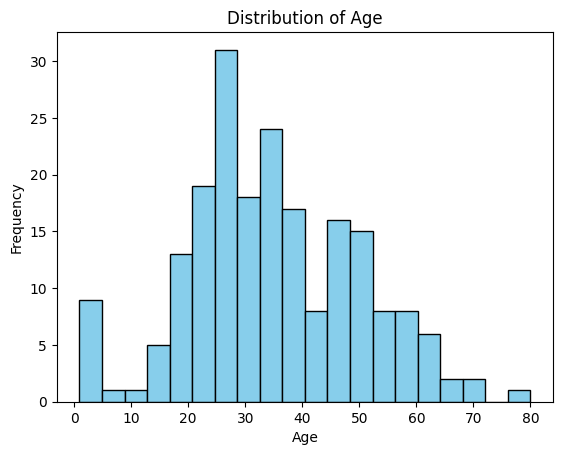

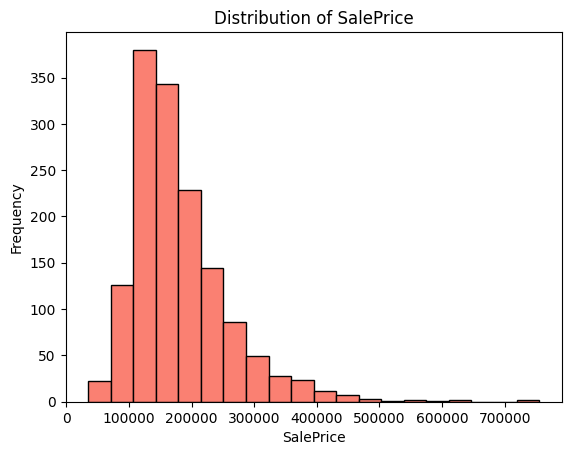

In [16]:
import matplotlib.pyplot as plt

# Histogram for 'Age' in Titanic dataset
plt.hist(titanic_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'SalePrice' in House Prices dataset
plt.hist(house_prices_df['SalePrice'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


##### 2. Summary Statistics
We'll compute summary statistics for numeric variables:


In [17]:
# Summary statistics for 'Age' in Titanic dataset
print("Summary Statistics for Age:")
print(titanic_df['Age'].describe())

# Summary statistics for 'SalePrice' in House Prices dataset
print("\nSummary Statistics for SalePrice:")
print(house_prices_df['SalePrice'].describe())


Summary Statistics for Age:
count    204.000000
mean      35.100098
std       15.100836
min        0.920000
25%       25.000000
50%       34.000000
75%       47.000000
max       80.000000
Name: Age, dtype: float64

Summary Statistics for SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


#### B. Categorical Variables
##### 1. Frequency Tables
We'll create frequency tables for categorical variables:


In [18]:
# Frequency table for 'Sex' in Titanic dataset
sex_frequency = titanic_df['Sex'].value_counts()
print("Frequency table for Sex:")
print(sex_frequency)

'''MSZoning refers to the zoning classification of residential properties in the House Prices dataset. Zoning is a way of categorizing and regulating land use in a specific area. It determines how a particular piece of land can be used, such as for residential, commercial, industrial, or agricultural purposes.

In the context of the House Prices dataset, MSZoning represents the zoning classification of each residential property. It provides information about the type of zone in which the property is located, which can be useful for analyzing and understanding the distribution of properties across different zoning categories.

The code you provided calculates the frequency table for the MSZoning variable in the House Prices dataset. This frequency table shows the count of properties in each zoning category, allowing you to analyze the distribution and prevalence of different zoning classifications in the dataset.'''
# Frequency table for 'MSZoning' in House Prices dataset

mszoning_frequency = house_prices_df['MSZoning'].value_counts()
print("\nFrequency table for MSZoning:")
print(mszoning_frequency)

Frequency table for Sex:
Sex
0    107
1     97
Name: count, dtype: int64

Frequency table for MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


##### 2. Bar Plots
We'll visualize the frequency of categorical variables using bar plots:


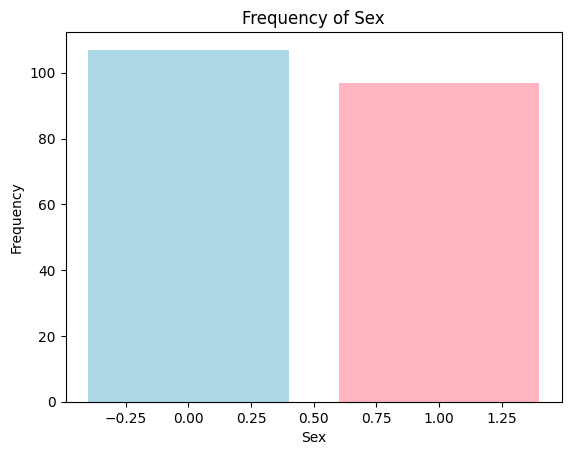

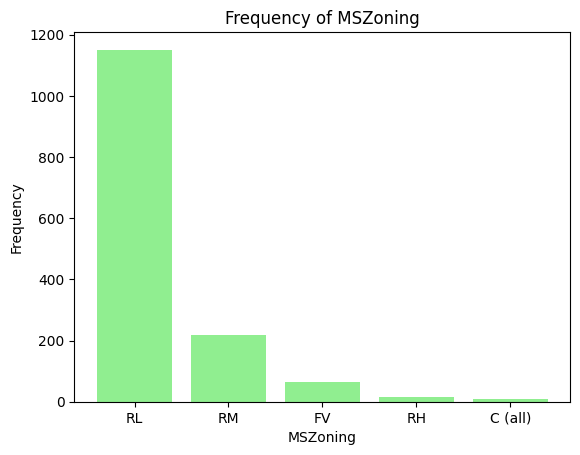

In [19]:
# Bar plot for 'Sex' in Titanic dataset
plt.bar(sex_frequency.index, sex_frequency.values, color=['lightblue', 'lightpink'])
plt.title('Frequency of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

# Bar plot for 'MSZoning' in House Prices dataset
plt.bar(mszoning_frequency.index, mszoning_frequency.values, color='lightgreen')
plt.title('Frequency of MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Frequency')
plt.show()

### IV. Bivariate Analysis
#### A. Numeric-Numeric Analysis
##### 1. Scatter Plots
We'll create scatter plots to explore relationships between numeric variables:


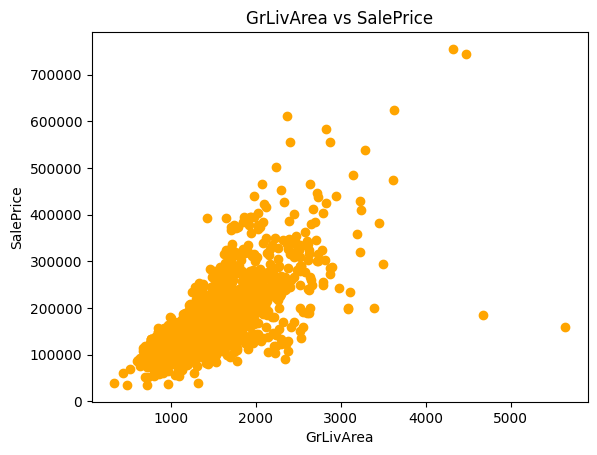

In [20]:
# Scatter plot for 'GrLivArea' vs 'SalePrice' in House Prices dataset
plt.scatter(house_prices_df['GrLivArea'], house_prices_df['SalePrice'], color='orange')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

##### 2. Correlation Analysis
We'll compute and visualize correlations between numeric variables:

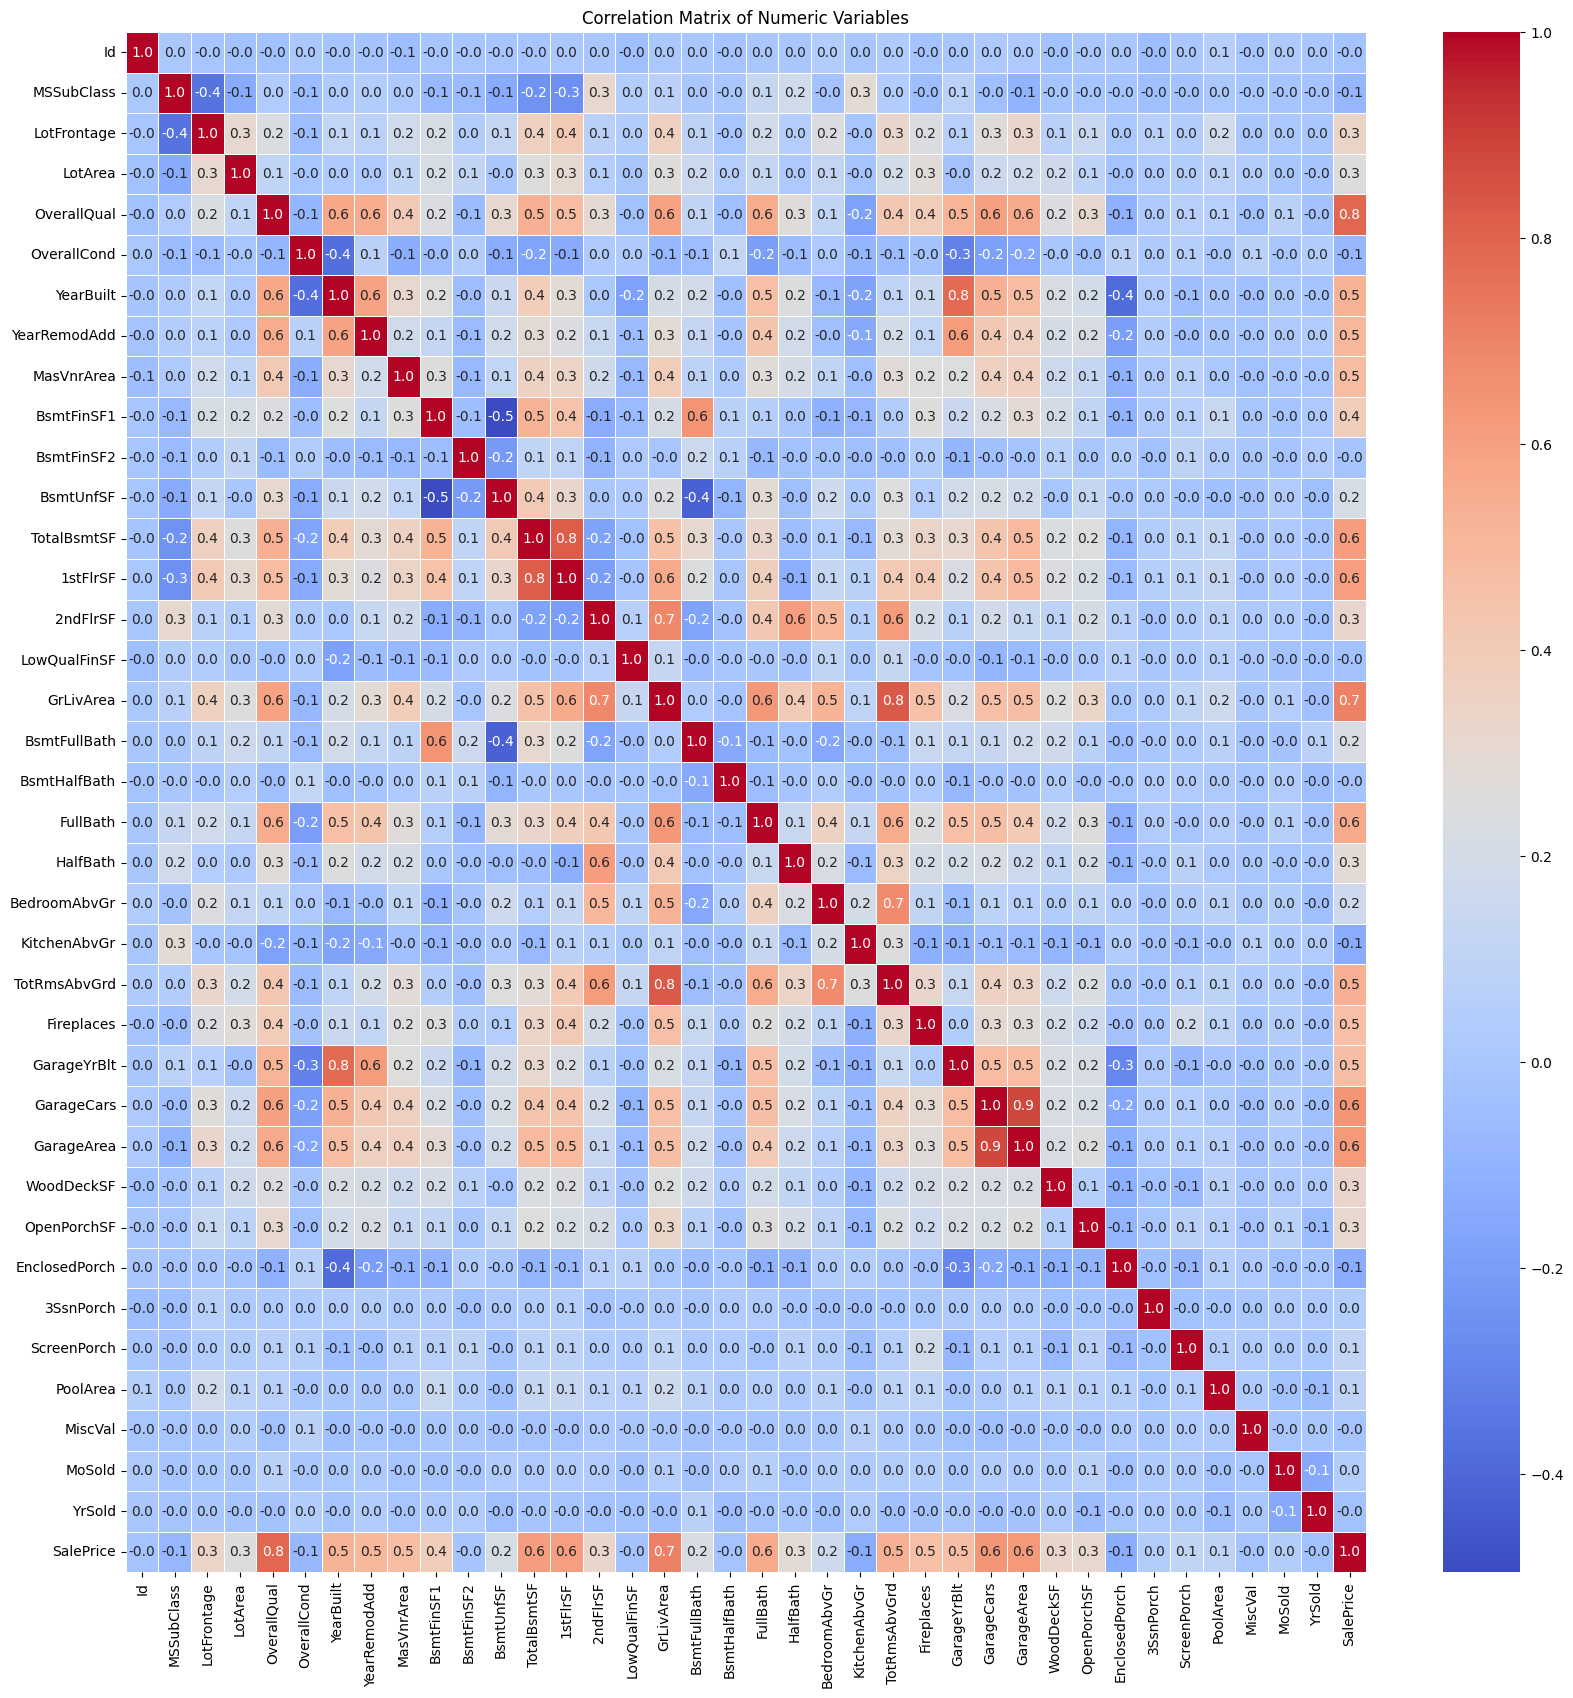

In [23]:
import seaborn as sns

# Correlation matrix for numeric variables in House Prices dataset
numeric_vars = house_prices_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_vars.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


#### B. Numeric-Categorical Analysis
##### 1. Box Plots
We'll use box plots to analyze the relationship between numeric and categorical variables:


C:\Users\Devasy\AppData\Local\Temp\ipykernel_25876\1374994474.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=titanic_df, palette='pastel')


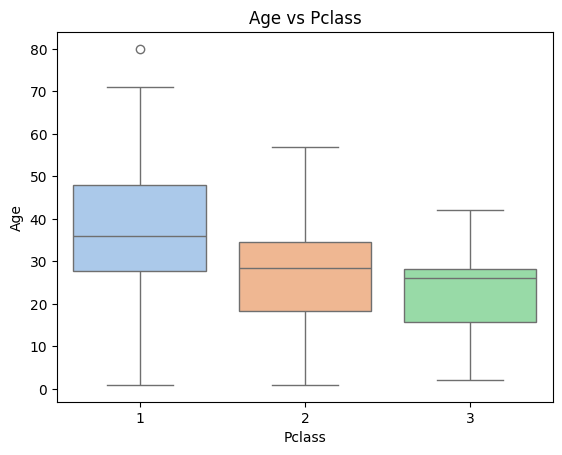

In [24]:
# Box plot for 'Pclass' vs 'Age' in Titanic dataset
sns.boxplot(x='Pclass', y='Age', data=titanic_df, palette='pastel')
plt.title('Age vs Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

##### 2. Violin Plots
We'll use violin plots to visualize the distribution of numeric variables across different categories:


C:\Users\Devasy\AppData\Local\Temp\ipykernel_25876\2172275321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='MSZoning', y='SalePrice', data=house_prices_df, palette='pastel')


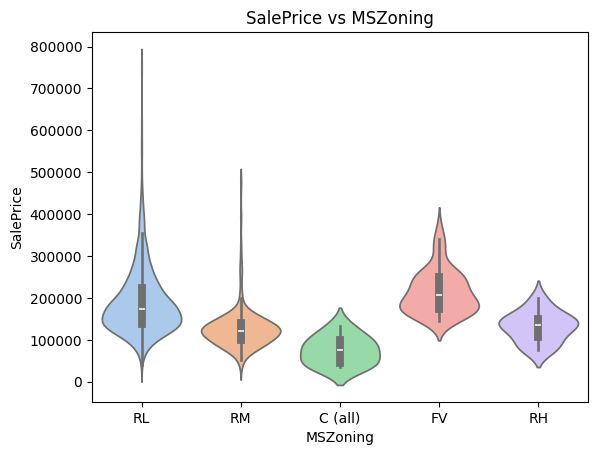

In [25]:
# Violin plot for 'MSZoning' vs 'SalePrice' in House Prices dataset
sns.violinplot(x='MSZoning', y='SalePrice', data=house_prices_df, palette='pastel')
plt.title('SalePrice vs MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.show()

#### C. Categorical-Categorical Analysis
##### 1. Crosstabulation
We'll create a cross-tabulation between two categorical variables:


In [26]:
# Cross-tabulation between 'Sex' and 'Survived' in Titanic dataset
cross_tab = pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])
print("Cross-tabulation between Sex and Survived:")
print(cross_tab)

Cross-tabulation between Sex and Survived:
Survived   0   1
Sex             
0         62  45
1          6  91


##### 2. Stacked Bar Plots
We'll visualize the cross-tabulation using stacked bar plots:

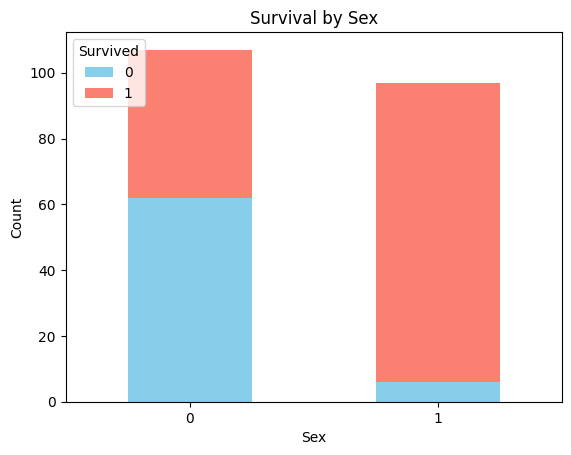

In [27]:
# Stacked bar plot for cross-tabulation between 'Sex' and 'Survived' in Titanic dataset
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', loc='upper left')
plt.show()


These analyses provide insights into the relationships and distributions within the datasets, aiding in further exploration and hypothesis generation.